In [5]:
!pip install tensorflow

     -------------------------------------- 331.8/331.8 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 60.4/60.4 kB ? eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 210.7/210.7 kB 6.5 MB/s eta 0:00:00
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
     ------------------------------------- 243.4/243.4 kB 15.5 MB/s eta 0:00:00


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


D:\spa\python\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [36]:
data = pd.read_csv("ADBL.csv")

data = data[['Close']]
data.dropna(inplace=True)

print(data.head())


   Close
0  114.0
1  118.0
2  115.0
3  114.0
4  113.0


In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [38]:
def create_sequences(dataset, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(dataset)):
        X.append(dataset[i-time_steps:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

TIME_STEPS = 60

X, y = create_sequences(scaled_data, TIME_STEPS)


In [39]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [40]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [41]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()


D:\spa\python\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0074 - val_loss: 2.3672e-04
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0019 - val_loss: 2.4875e-04
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0017 - val_loss: 1.2561e-04
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0017 - val_loss: 2.3591e-04
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0016 - val_loss: 1.8808e-04
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0016 - val_loss: 1.0287e-04
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013 - val_loss: 2.1342e-04
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012 - val_loss: 1.1413e-04
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013 - val_loss: 1.6189e-04
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0011 - val_loss: 1.0289e-04
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0012 - val_loss: 9.9986e-05
Epoch 12/50
79/79 ━

In [43]:
model.save("lstm_stock_pretrained_model.h5")


In [44]:
from tensorflow.keras.models import load_model
model = load_model("lstm_stock_pretrained_model.h5")


In [45]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


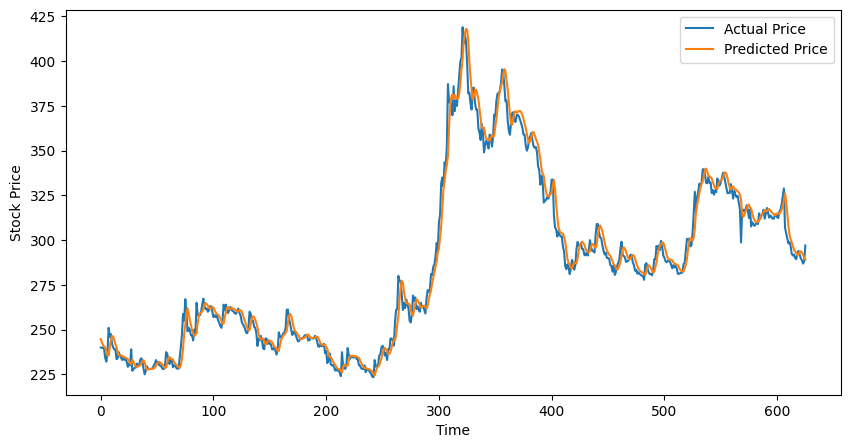

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [49]:
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print("RMSE:", rmse)

last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape(1, 60, 1)

Predicted_scaled = model.predict(last_60_days)
Predicted_price = scaler.inverse_transform(Predicted_scaled)

print("Predicted price:", Predicted_price[0][0])

RMSE: 6.352471934048605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted price: 291.77277
